In [42]:
from keras.datasets import reuters
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import copy
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
#chaged in \Lib\site-packages\keras\datasets\reuters.py  
#from
#np.load(path) as f:
#to
#with np.load(path, allow_pickle=True) as f:
(train_data,trail_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

In [4]:
print(len(train_data))
print(len(test_data))

8982
2246


In [7]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [12]:
#decoding similar to imdb dataset
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [13]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [15]:
#using vectorize_sequences function form imdb notebook copied to vect_seq.py
import vect_seq

x_train = vect_seq.vectorize_sequences(train_data)
x_test = vect_seq.vectorize_sequences(test_data)

In [23]:
#same as keras.utils.np_utils to_categorical
def to_one_hot (labels, dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i,label] = 1.
    return results

In [24]:
one_hot_train_labels = to_one_hot(trail_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [29]:
#same as handmade func to_one_hot
one_hot_train_labels = to_categorical(trail_labels)
one_hot_test_labels = to_categorical(test_labels)

In [31]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,))) #numbers of neirons increased form imdb, because output has 46 values
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax')) #big number of results, using softmax is a good choice

Instructions for updating:
Colocations handled automatically by placer.


In [33]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
#creating test sequence
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [35]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 653us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 126us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 113us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 111us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 112us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 112us/step - loss: 0.4581 - a

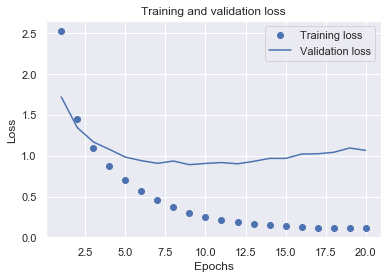

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

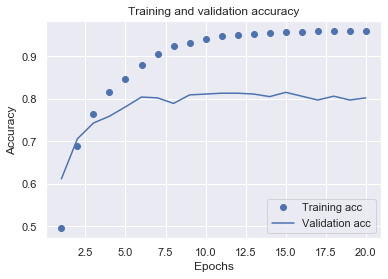

In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [41]:
#model retrained, recreate with reducing number of epochs to 9
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))

print(model.evaluate(x_test, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 145us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 109us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 108us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 108us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 112us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.4124 - acc: 0.9139 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [43]:
#random clasification
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hit_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hit_array))/len(test_labels)

0.182546749777382

In [44]:
#cheking model by predicting test sequence and look at shape
prediction = model.predict(x_test)
prediction[0].shape

(46,)

In [45]:
np.sum(prediction[0]) #must be limited or equal 1

0.99999976

In [52]:
np.argmax(prediction[0])

3

In [53]:
#experements
model = models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))

print(model.evaluate(x_test, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 175us/step - loss: 2.1650 - acc: 0.5698 - val_loss: 1.4026 - val_acc: 0.6750
Epoch 2/9
7982/7982 [==============================] - 1s 121us/step - loss: 1.0982 - acc: 0.7583 - val_loss: 1.0883 - val_acc: 0.7680
Epoch 3/9
7982/7982 [==============================] - 1s 122us/step - loss: 0.7724 - acc: 0.8343 - val_loss: 0.9597 - val_acc: 0.8090
Epoch 4/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.5633 - acc: 0.8822 - val_loss: 0.8792 - val_acc: 0.8210
Epoch 5/9
7982/7982 [==============================] - 1s 115us/step - loss: 0.4071 - acc: 0.9148 - val_loss: 0.8734 - val_acc: 0.8070
Epoch 6/9
7982/7982 [==============================] - 1s 112us/step - loss: 0.3140 - acc: 0.9323 - val_loss: 0.8845 - val_acc: 0.8090
Epoch 7/9
7982/7982 [==============================] - 1s 113us/step - loss: 0.2482 - acc: 0.9420 - val_loss: 0.8709 - val_acc: 0.8200
Epoch 8

In [54]:
#experements
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))

print(model.evaluate(x_test, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 141us/step - loss: 2.8626 - acc: 0.3944 - val_loss: 2.1361 - val_acc: 0.5430
Epoch 2/9
7982/7982 [==============================] - 1s 112us/step - loss: 1.8253 - acc: 0.6334 - val_loss: 1.5945 - val_acc: 0.6620
Epoch 3/9
7982/7982 [==============================] - 1s 114us/step - loss: 1.3976 - acc: 0.7076 - val_loss: 1.3490 - val_acc: 0.7090
Epoch 4/9
7982/7982 [==============================] - 1s 107us/step - loss: 1.1622 - acc: 0.7461 - val_loss: 1.2281 - val_acc: 0.7220
Epoch 5/9
7982/7982 [==============================] - 1s 107us/step - loss: 0.9928 - acc: 0.7767 - val_loss: 1.1418 - val_acc: 0.7440
Epoch 6/9
7982/7982 [==============================] - 1s 111us/step - loss: 0.8528 - acc: 0.8062 - val_loss: 1.0727 - val_acc: 0.7570
Epoch 7/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.7353 - acc: 0.8343 - val_loss: 1.0321 - val_acc: 0.7670
Epoch 8

In [55]:
#experements
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

print(model.evaluate(x_test, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 147us/step - loss: 3.1972 - acc: 0.4068 - val_loss: 2.5412 - val_acc: 0.5740
Epoch 2/20
7982/7982 [==============================] - 1s 110us/step - loss: 2.0988 - acc: 0.6185 - val_loss: 1.7790 - val_acc: 0.6400
Epoch 3/20
7982/7982 [==============================] - 1s 111us/step - loss: 1.5124 - acc: 0.7010 - val_loss: 1.4358 - val_acc: 0.7010
Epoch 4/20
7982/7982 [==============================] - 1s 112us/step - loss: 1.2178 - acc: 0.7393 - val_loss: 1.2676 - val_acc: 0.7160
Epoch 5/20
7982/7982 [==============================] - 1s 107us/step - loss: 1.0326 - acc: 0.7769 - val_loss: 1.1600 - val_acc: 0.7430
Epoch 6/20
7982/7982 [==============================] - 1s 107us/step - loss: 0.8892 - acc: 0.8091 - val_loss: 1.0969 - val_acc: 0.7520
Epoch 7/20
7982/7982 [==============================] - 1s 108us/step - loss: 0.7689 - acc: 0.8353 - val_loss: 1.0470 - val_acc: 0.7600


In [56]:
#experements
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))

print(model.evaluate(x_test, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 163us/step - loss: 2.5960 - acc: 0.4166 - val_loss: 1.7413 - val_acc: 0.5680
Epoch 2/9
7982/7982 [==============================] - 1s 112us/step - loss: 1.5636 - acc: 0.6263 - val_loss: 1.4990 - val_acc: 0.6600
Epoch 3/9
7982/7982 [==============================] - 1s 111us/step - loss: 1.2237 - acc: 0.7145 - val_loss: 1.3408 - val_acc: 0.6800
Epoch 4/9
7982/7982 [==============================] - 1s 112us/step - loss: 1.0040 - acc: 0.7483 - val_loss: 1.2100 - val_acc: 0.7170
Epoch 5/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.8281 - acc: 0.7879 - val_loss: 1.1457 - val_acc: 0.7420
Epoch 6/9
7982/7982 [==============================] - 1s 111us/step - loss: 0.7150 - acc: 0.8213 - val_loss: 1.1645 - val_acc: 0.7490
Epoch 7/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.5558 - acc: 0.8588 - val_loss: 1.1861 - val_acc: 0.7570
Epoch 8

In [57]:
#experements
model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))

print(model.evaluate(x_test, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 198us/step - loss: 2.3956 - acc: 0.4060 - val_loss: 1.5400 - val_acc: 0.6180
Epoch 2/9
7982/7982 [==============================] - 1s 121us/step - loss: 1.3469 - acc: 0.6798 - val_loss: 1.2383 - val_acc: 0.6960
Epoch 3/9
7982/7982 [==============================] - 1s 122us/step - loss: 1.0072 - acc: 0.7418 - val_loss: 1.1503 - val_acc: 0.7290
Epoch 4/9
7982/7982 [==============================] - 1s 127us/step - loss: 0.7361 - acc: 0.8146 - val_loss: 1.6733 - val_acc: 0.6350
Epoch 5/9
7982/7982 [==============================] - 1s 127us/step - loss: 0.5883 - acc: 0.8463 - val_loss: 1.2191 - val_acc: 0.7570
Epoch 6/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.4481 - acc: 0.8837 - val_loss: 1.0249 - val_acc: 0.7770
Epoch 7/9
7982/7982 [==============================] - 1s 130us/step - loss: 0.3450 - acc: 0.9083 - val_loss: 1.2108 - val_acc: 0.7490
Epoch 8

In [58]:
#experements
model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=30, batch_size=512, validation_data=(x_val,y_val))

print(model.evaluate(x_test, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/30
7982/7982 [==============================] - 2s 217us/step - loss: 2.8792 - acc: 0.2992 - val_loss: 1.8406 - val_acc: 0.4740
Epoch 2/30
7982/7982 [==============================] - 1s 127us/step - loss: 1.7685 - acc: 0.5283 - val_loss: 1.5890 - val_acc: 0.5860
Epoch 3/30
7982/7982 [==============================] - 1s 126us/step - loss: 1.5064 - acc: 0.5874 - val_loss: 1.4534 - val_acc: 0.6310
Epoch 4/30
7982/7982 [==============================] - 1s 126us/step - loss: 1.2707 - acc: 0.6596 - val_loss: 1.4213 - val_acc: 0.6450
Epoch 5/30
7982/7982 [==============================] - 1s 127us/step - loss: 1.0798 - acc: 0.7121 - val_loss: 1.3196 - val_acc: 0.6730
Epoch 6/30
7982/7982 [==============================] - 1s 126us/step - loss: 0.9292 - acc: 0.7451 - val_loss: 1.3000 - val_acc: 0.7130
Epoch 7/30
7982/7982 [==============================] - 1s 131us/step - loss: 0.8197 - acc: 0.7705 - val_loss: 1.2792 - val_acc: 0.7280


In [59]:
#experements
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val,y_val))

print(model.evaluate(x_test, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 206us/step - loss: 2.9821 - acc: 0.2601 - val_loss: 2.3427 - val_acc: 0.3710
Epoch 2/20
7982/7982 [==============================] - 1s 137us/step - loss: 2.0612 - acc: 0.3862 - val_loss: 1.8137 - val_acc: 0.4040
Epoch 3/20
7982/7982 [==============================] - 1s 138us/step - loss: 1.5687 - acc: 0.5515 - val_loss: 1.5207 - val_acc: 0.6180
Epoch 4/20
7982/7982 [==============================] - 1s 140us/step - loss: 1.3102 - acc: 0.6644 - val_loss: 1.4185 - val_acc: 0.6470
Epoch 5/20
7982/7982 [==============================] - 1s 139us/step - loss: 1.1725 - acc: 0.6814 - val_loss: 1.3783 - val_acc: 0.6510
Epoch 6/20
7982/7982 [==============================] - 1s 138us/step - loss: 1.0808 - acc: 0.6954 - val_loss: 1.3737 - val_acc: 0.6600
Epoch 7/20
7982/7982 [==============================] - 1s 137us/step - loss: 1.0090 - acc: 0.7129 - val_loss: 1.4365 - val_acc: 0.6680


In [60]:
#experements
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=32, validation_data=(x_val,y_val))

print(model.evaluate(x_test, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 322us/step - loss: 2.6428 - acc: 0.4332 - val_loss: 2.2279 - val_acc: 0.4420
Epoch 2/20
7982/7982 [==============================] - 2s 248us/step - loss: 1.8924 - acc: 0.4153 - val_loss: 1.7087 - val_acc: 0.4710
Epoch 3/20
7982/7982 [==============================] - 2s 252us/step - loss: 1.5050 - acc: 0.5950 - val_loss: 1.5811 - val_acc: 0.5720
Epoch 4/20
7982/7982 [==============================] - 2s 254us/step - loss: 1.3690 - acc: 0.6144 - val_loss: 1.5653 - val_acc: 0.5930
Epoch 5/20
7982/7982 [==============================] - 2s 253us/step - loss: 1.2980 - acc: 0.6446 - val_loss: 1.6162 - val_acc: 0.6050
Epoch 6/20
7982/7982 [==============================] - 2s 256us/step - loss: 1.2386 - acc: 0.6619 - val_loss: 1.6750 - val_acc: 0.6360
Epoch 7/20
7982/7982 [==============================] - 2s 252us/step - loss: 1.1262 - acc: 0.7108 - val_loss: 1.5947 - val_acc: 0.6520


In [61]:
#experements
model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=30, batch_size=512, validation_data=(x_val,y_val))

print(model.evaluate(x_test, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/30
7982/7982 [==============================] - 2s 207us/step - loss: 2.1812 - acc: 0.5239 - val_loss: 1.3665 - val_acc: 0.6880
Epoch 2/30
7982/7982 [==============================] - 1s 122us/step - loss: 1.1248 - acc: 0.7418 - val_loss: 1.1399 - val_acc: 0.7530
Epoch 3/30
7982/7982 [==============================] - 1s 122us/step - loss: 0.7771 - acc: 0.8262 - val_loss: 1.0156 - val_acc: 0.7910
Epoch 4/30
7982/7982 [==============================] - 1s 121us/step - loss: 0.5624 - acc: 0.8767 - val_loss: 0.9112 - val_acc: 0.8140
Epoch 5/30
7982/7982 [==============================] - 1s 121us/step - loss: 0.3733 - acc: 0.9217 - val_loss: 1.1401 - val_acc: 0.7430
Epoch 6/30
7982/7982 [==============================] - 1s 120us/step - loss: 0.2805 - acc: 0.9374 - val_loss: 0.9283 - val_acc: 0.8150
Epoch 7/30
7982/7982 [==============================] - 1s 119us/step - loss: 0.2704 - acc: 0.9386 - val_loss: 0.9201 - val_acc: 0.8270


In [62]:
#experements
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=30, batch_size=512, validation_data=(x_val,y_val))

print(model.evaluate(x_test, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/30
7982/7982 [==============================] - 2s 190us/step - loss: 2.7603 - acc: 0.4697 - val_loss: 1.7879 - val_acc: 0.6050
Epoch 2/30
7982/7982 [==============================] - 1s 110us/step - loss: 1.5032 - acc: 0.6780 - val_loss: 1.3942 - val_acc: 0.7020
Epoch 3/30
7982/7982 [==============================] - 1s 109us/step - loss: 1.1502 - acc: 0.7340 - val_loss: 1.2272 - val_acc: 0.7270
Epoch 4/30
7982/7982 [==============================] - 1s 111us/step - loss: 0.9250 - acc: 0.7920 - val_loss: 1.1345 - val_acc: 0.7610
Epoch 5/30
7982/7982 [==============================] - 1s 110us/step - loss: 0.7368 - acc: 0.8411 - val_loss: 1.0528 - val_acc: 0.7820
Epoch 6/30
7982/7982 [==============================] - 1s 110us/step - loss: 0.5973 - acc: 0.8700 - val_loss: 0.9782 - val_acc: 0.7980
Epoch 7/30
7982/7982 [==============================] - 1s 112us/step - loss: 0.4673 - acc: 0.9032 - val_loss: 0.9723 - val_acc: 0.8010


In [63]:
reuters?